In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.lines as mlines
matplotlib.rcParams['font.family'] = "monospace"
import pandas as pd 
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.lines import Line2D
import plotting_utils
import statistics

plt.rcParams.update({
    "figure.facecolor":  (1, 1, 1, 1), 
    "axes.facecolor":    (1, 1, 1, 1), 
    "savefig.facecolor": (1, 1, 1, 1), 
})

In [3]:
def get_color(elems):
    cmap = plt.cm.tab20c
    color = []
    for elem in elems:
        if 'knee 25' in elem:
            color.append(cmap((2*4+2)/20))
        elif 'knee 50' in elem:
            color.append(cmap((2*4+1)/20))
        elif 'knee' in elem:
            color.append(cmap(2*4/20))
        elif 'neuro' in elem:
            color.append(cmap(1/5))
        elif 'joint 25 uni' in elem:
            color.append(cmap((2)/20))
        elif 'joint 50 uni' in elem:
            color.append(cmap((1)/20))
        elif 'joint 100 uni' in elem:
            color.append(cmap((0)/20))
        elif 'joint 25' in elem:
            color.append(cmap((3*4+2)/20))
        elif 'joint 50' in elem:
            color.append(cmap((3*4+1)/20))
        elif 'joint 100' in elem:
            color.append(cmap((3*4+0)/20))
        else:
            color.append(cmap(3/5))
    return color


def get_median(list):
    return statistics.median(list[0])


def get_plotting_data_boxplots(df, network_keys, anatomy_keys, eval_metric, network_column):
    labels = []
    data = []
    colors = []
    cols = [network_column, 'dset', eval_metric, eval_metric+'_std']
    for nkey in network_keys:
        df_eval = df[df[network_column]==nkey]
        for ecol in anatomy_keys:
            colors.append(get_color([ecol]))
            labels.append(ecol)
            df_anat = df_eval[df_eval['anatomy']==ecol]
            data.append(df_anat[eval_metric].tolist())

    # sort data
    #data = sorted(data, key=get_median)
    data = [x for x in data if x != []]
    sorted_lists = sorted(zip(data, labels, colors), key=get_median)
    data = [x for x, _, _ in sorted_lists]
    labels = [x for _, x, _ in sorted_lists]
    colors = [x for _, _, x in sorted_lists]

    return data, labels, colors


def get_legend(eval_dset, disp_dset):
    legend_elements = []
    color = get_color(eval_dset)
    for c, l in zip(color, disp_dset):
        legend_elements.append(Patch(facecolor=c, label=l))
    return legend_elements

# Get Column content

In [4]:
anatomy = 'brain'
Reval = 4

df = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')

networks = df.network.unique()
acq_types = df.acquisition.unique() #acquisition types: ['AXFLAIR', 'AXT1POST', 'AXT1', 'AXT2']
scanner_models = df.systemModel.unique() #scanner models: ['Skyra' 'Aera' 'Biograph_mMR' 'Prisma_fit' 'TrioTim' 'Avanto']

print("\033[4m" + "Dataset:", anatomy, "R" + str(Reval) + "\033[0m")
print("Networks:", networks)
print("Acquisition Types:", acq_types)
print("Scanner models:", scanner_models)

Dataset: brain R4
Networks: ['GD-DUNET' 'PM-DUNET' 'VS-DUNET' 'UNET' 'VN' 'MoDL']
Acquisition Types: ['AXFLAIR' 'AXT1POST' 'AXT1' 'AXT2']
Scanner models: ['Skyra' 'Aera' 'Biograph_mMR' 'Prisma_fit' 'TrioTim' 'Avanto']


# Ranked List visualizations - Boxplots

['knee 100', 'neuro']
['UNET', 'UNET', 'MoDL', 'VS-DUNET', 'VN', 'VN', 'GD-DUNET', 'MoDL', 'PM-DUNET', 'VS-DUNET', 'GD-DUNET', 'PM-DUNET']


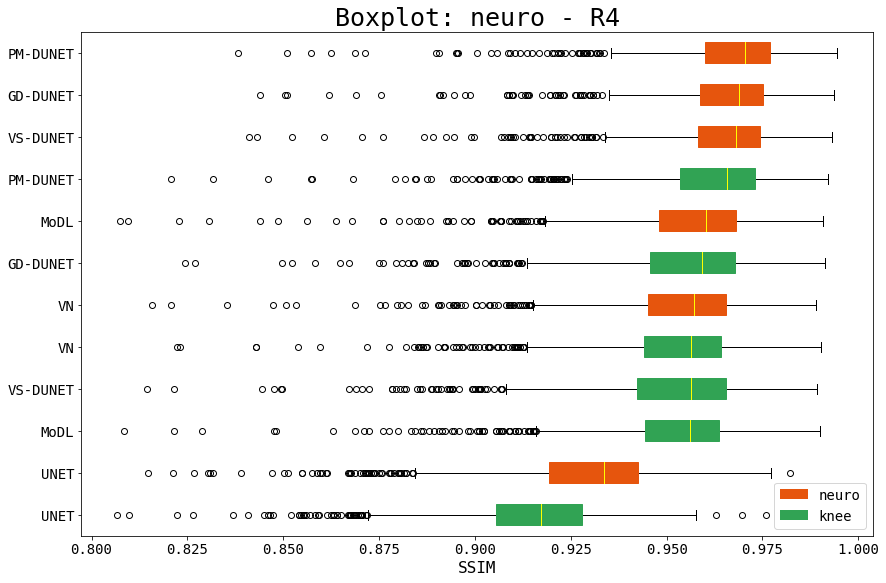

In [4]:
anatomy = 'brain'
anatomy_title = 'neuro'
Reval = 4

eval_metric = 'SSIM'
eval_dset = ['neuro','knee 100'] # name of dataset in csv
disp_dset = ['neuro','knee'] # display name of dataset

df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')

df = df_raw
# evaluate wrt. SSIM and drop other measures
drop_metric = [m for m in ['MSE', 'PSNR', 'NMSE', 'SSIM'] if m != eval_metric]
df.drop(columns=drop_metric, inplace=True)

anatomy_keys = df['anatomy'].unique()
network_keys = df['network'].unique()

# only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
anatomy_keys = [key for key in anatomy_keys if key in eval_dset]
print(anatomy_keys)

data, labels, colors = get_plotting_data_boxplots(df, network_keys, anatomy_keys, eval_metric, network_column='network')
print(labels)

# plotting:
fig = plt.figure(figsize =(11, 7))

legend = get_legend(eval_dset, disp_dset)
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

# Creating plot
bp = ax.boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)
#bp = ax.boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops, meanprops=meanlineprops, meanline=True, show_mean = True)

# set colors
cmap = plt.cm.tab20c
for line, color in zip(bp['boxes'], colors):
    line.set_color(color[0])

# show plot
plt.title(f"Boxplot: {anatomy_title} - R{Reval}", fontsize=25)
plt.legend(handles=legend, loc='lower right', fontsize=14)
plt.xlabel(eval_metric, fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

['knee 100', 'neuro']
['UNET', 'VN', 'UNET', 'MoDL', 'VS-DUNET', 'GD-DUNET', 'VN', 'MoDL', 'PM-DUNET', 'VS-DUNET', 'GD-DUNET', 'PM-DUNET']
['knee 100', 'neuro']
['UNET', 'UNET', 'VN', 'MoDL', 'VS-DUNET', 'GD-DUNET', 'MoDL', 'VN', 'PM-DUNET', 'PM-DUNET', 'VS-DUNET', 'GD-DUNET']


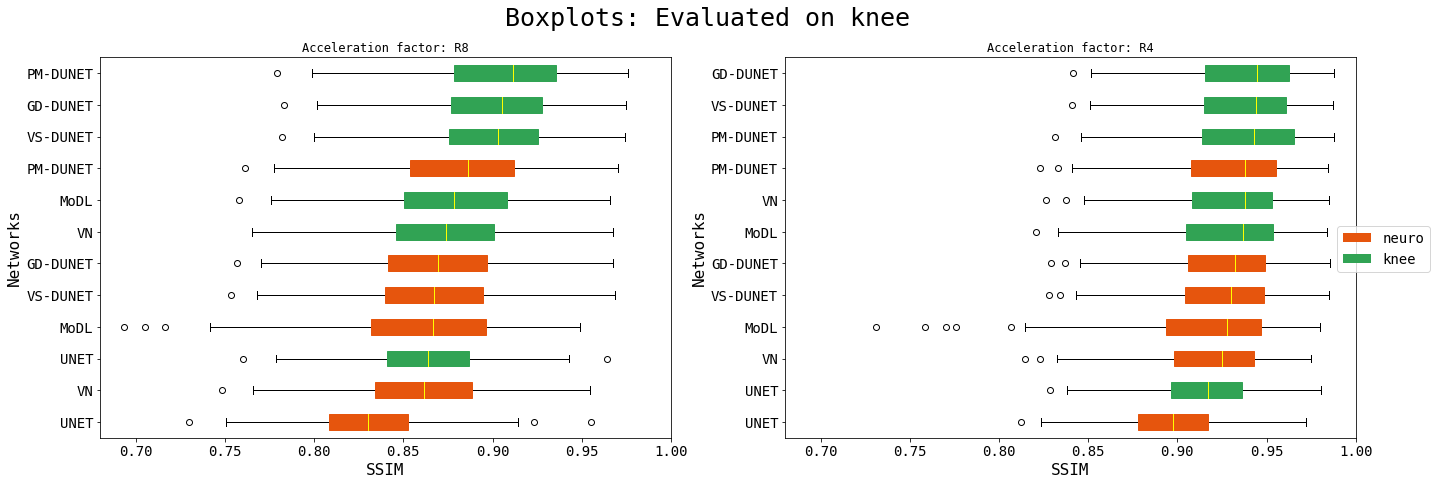

In [5]:
anatomy = 'knee'
anatomy_title = 'knee'
Revals = [8, 4]

eval_metric = 'SSIM'
eval_dset = ['neuro','knee 100'] # name of dataset in csv
disp_dset = ['neuro','knee'] # display name of dataset

fig, axis = plt.subplots(1, len(Revals), figsize=((len(Revals) + 0.25)*10, 7))

meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

legend = get_legend(eval_dset, disp_dset)

min_xlim = []

for i, Reval in enumerate(Revals):
    df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')
    df = df_raw

    anatomy_keys = df['anatomy'].unique()
    network_keys = df['network'].unique()

    # only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
    anatomy_keys = [key for key in anatomy_keys if key in eval_dset]
    print(anatomy_keys)

    data, labels, colors = get_plotting_data_boxplots(df, network_keys, anatomy_keys, eval_metric, network_column='network')
    print(labels)

    # Creating plot
    bp = axis[i].boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)
    #bp = ax.boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops, meanprops=meanlineprops, meanline=True, show_mean = True)

    axis[i].set_title(f'Acceleration factor: R{Reval}')
    axis[i].set_xlabel(eval_metric, fontsize=16)
    axis[i].set_ylabel("Networks", fontsize=16)
    axis[i].set_aspect('auto', adjustable='box')
    # set colors
    cmap = plt.cm.tab20c
    for line, color in zip(bp['boxes'], colors):
        line.set_color(color[0])
    
    min_xlim.append(min([min(x) for x in data]))

# set common x-axis value for all subplot
xlim = (round(min(min_xlim)-0.01, 2), 1.0)
for i, _ in enumerate(Revals):
    axis[i].set_xlim(xlim)
    axis[i].tick_params(axis='y', labelsize=14)
    axis[i].tick_params(axis='x', labelsize=14)

# show plot
fig.suptitle(f"Boxplots: Evaluated on {anatomy_title}", fontsize=25)
fig.legend(handles=legend, loc='center right', bbox_to_anchor=(0.95,0.5), fontsize=14)
plt.show()

1
['MoDL']
1


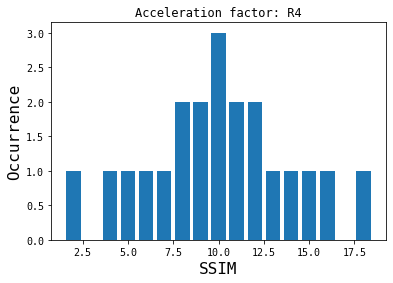

In [25]:
new = [data[3]]
new2 = [labels[3]]
print(len(new2))
print(new2)
print(len(new))

new[0].sort()
new_list = new[0][70:]
new_list.append(0.9897)
new_list.append(0.9924)

new_list = np.array([2,4,5,6,7,8,8,9,9,10,10,10,11,11,12,12,13,14,15,16,18])
#new_list = [1,2,2,3,3,3,4,4,4,4,5,5,5,6,6,7]
new_list, counts = np.unique(new_list, return_counts=True)
fig, axis = plt.subplots(1, 1)
#axis.boxplot(new_list, labels=new2, patch_artist=True, vert=False, medianprops=meadlineprops)
axis.bar(new_list, counts, align='center')
axis.set_title(f'Acceleration factor: R{Reval}')
axis.set_xlabel(eval_metric, fontsize=16)
axis.set_ylabel("Occurrence", fontsize=16)
axis.set_aspect('auto', adjustable='box')
plt.show()


In [134]:
print(labels)
color_attribution = {(0.19215686274509805, 0.6392156862745098, 0.32941176470588235, 1.0): 'knee 100', (0.9019607843137255, 0.3333333333333333, 0.050980392156862744, 1.0): 'neuro'}
#colors[-1] = colors[-1][0]
#colors_combined = [print(color[0]) for color in colors]
colors_combined = [color_attribution[color[0]] for color in colors]

labels_combined = [i + ' ' + j for i, j in zip(labels, colors_combined)]
print(labels_combined)

def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_xdata()[1]
        #dict1['lower_quartile'] = bp['boxes'][i].get_xdata()[1]
        dict1['median'] = bp['medians'][i].get_xdata()[1]
        #dict1['upper_quartile'] = bp['boxes'][i].get_xdata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_xdata()[1]
        dict1['delta'] = bp['whiskers'][(i*2)+1].get_xdata()[1] - bp['whiskers'][i*2].get_xdata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list).round(6)

['UNET', 'VN', 'MoDL', 'UNET', 'GD-DUNET', 'VS-DUNET', 'PM-DUNET', 'VN', 'MoDL', 'VS-DUNET', 'GD-DUNET', 'PM-DUNET']
['UNET knee 100', 'VN knee 100', 'MoDL knee 100', 'UNET neuro', 'GD-DUNET knee 100', 'VS-DUNET knee 100', 'PM-DUNET knee 100', 'VN neuro', 'MoDL neuro', 'VS-DUNET neuro', 'GD-DUNET neuro', 'PM-DUNET neuro']


In [135]:
print(get_box_plot_data(labels_combined, bp))

                label  lower_whisker    median  upper_whisker     delta
0       UNET knee 100       0.761116  0.837532       0.909394  0.148279
1         VN knee 100       0.788755  0.879084       0.965000  0.176244
2       MoDL knee 100       0.801013  0.888223       0.967111  0.166099
3          UNET neuro       0.829454  0.888970       0.946404  0.116951
4   GD-DUNET knee 100       0.819806  0.898252       0.968508  0.148702
5   VS-DUNET knee 100       0.838553  0.908645       0.973126  0.134573
6   PM-DUNET knee 100       0.835010  0.913248       0.981654  0.146644
7            VN neuro       0.838386  0.915585       0.980586  0.142200
8          MoDL neuro       0.858473  0.928519       0.984636  0.126162
9      VS-DUNET neuro       0.905237  0.947115       0.982746  0.077509
10     GD-DUNET neuro       0.905309  0.948066       0.983176  0.077867
11     PM-DUNET neuro       0.911431  0.954808       0.989973  0.078543


In [138]:
from matplotlib.cbook import boxplot_stats

df_eval = df[df['network']=='MoDL']
df_anat = df_eval[df_eval['anatomy']=='neuro']

df_anat.describe() #0.030441 VN vs 0.024801 UNET

,systemFieldStrength_T,receiverChannels,TR,TE,TI,flipAngle_deg,echo_spacing,MSE,NMSE,PSNR,SSIM
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1142.000000,1.365000e+03,1365.000000,1365.000000,1365.000000
mean,2.275315,12.846154,4227.186081,72.452923,313.186813,140.671795,9.944221,3.854190e-10,0.022510,33.296530,0.922269
std,0.695291,6.401733,2893.517531,47.497232,603.413213,34.790460,0.445149,3.216969e-10,0.012153,2.627258,0.028719
min,1.494000,4.000000,250.000000,2.640000,100.000000,70.000000,9.020000,1.464568e-11,0.005232,24.605003,0.742567
25%,1.494000,4.000000,461.000000,9.400000,100.000000,140.000000,9.560000,1.624038e-10,0.014046,31.596567,0.908564
50%,2.893600,16.000000,5120.000000,103.000000,100.000000,150.000000,10.160000,2.892076e-10,0.019535,33.332242,0.928519
75%,2.893600,20.000000,6190.000000,113.000000,300.000000,161.000000,10.260000,4.993067e-10,0.027647,35.076683,0.942568
max,2.893600,20.000000,9000.000000,126.000000,2500.000000,180.000000,11.440000,2.543643e-09,0.098140,46.099603,0.984636


### For Scanner models:

['Avanto', 'TrioTim', 'Aera', 'Skyra', 'Prisma_fit', 'Biograph_mMR', 'Avanto', 'TrioTim', 'Aera', 'Skyra', 'Prisma_fit', 'Biograph_mMR']


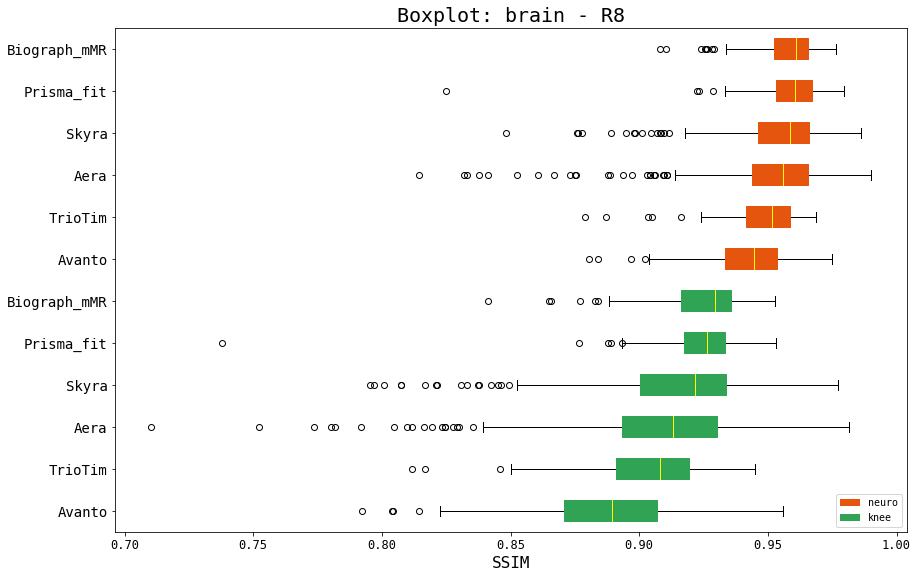

In [11]:
anatomy = 'brain'
Reval = 8

eval_metric = 'SSIM'
eval_dset = ['neuro','knee 100'] # name of dataset in csv
disp_dset = ['neuro','knee'] # display name of dataset

df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')

networks = df_raw.network.unique()
network_type = 'PM-DUNET'

df = df_raw
df = df[df.network == network_type]

anatomy_keys = df['anatomy'].unique()
model_keys = df['systemModel'].unique()

# only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
anatomy_keys = [key for key in anatomy_keys if key in eval_dset]
data, labels, colors = get_plotting_data_boxplots(df, model_keys, anatomy_keys, eval_metric, network_column='systemModel')
print(labels)

# plotting:
fig = plt.figure(figsize =(11, 7))

legend = get_legend(eval_dset, disp_dset)
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

# Creating plot
bp = ax.boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)
#bp = ax.boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops, meanprops=meanlineprops, meanline=True, show_mean = True)

# set colors
cmap = plt.cm.tab20c
for line, color in zip(bp['boxes'], colors):
    line.set_color(color[0])

# show plot
plt.title(f"Boxplot: {anatomy} - R{Reval}", fontsize=20)
plt.legend(handles=legend, loc='lower right')
plt.xlabel(eval_metric, fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.show()

['Prisma_fit' 'Skyra' 'Aera' 'Biograph_mMR']
['Prisma_fit' 'Skyra' 'Aera' 'Biograph_mMR']


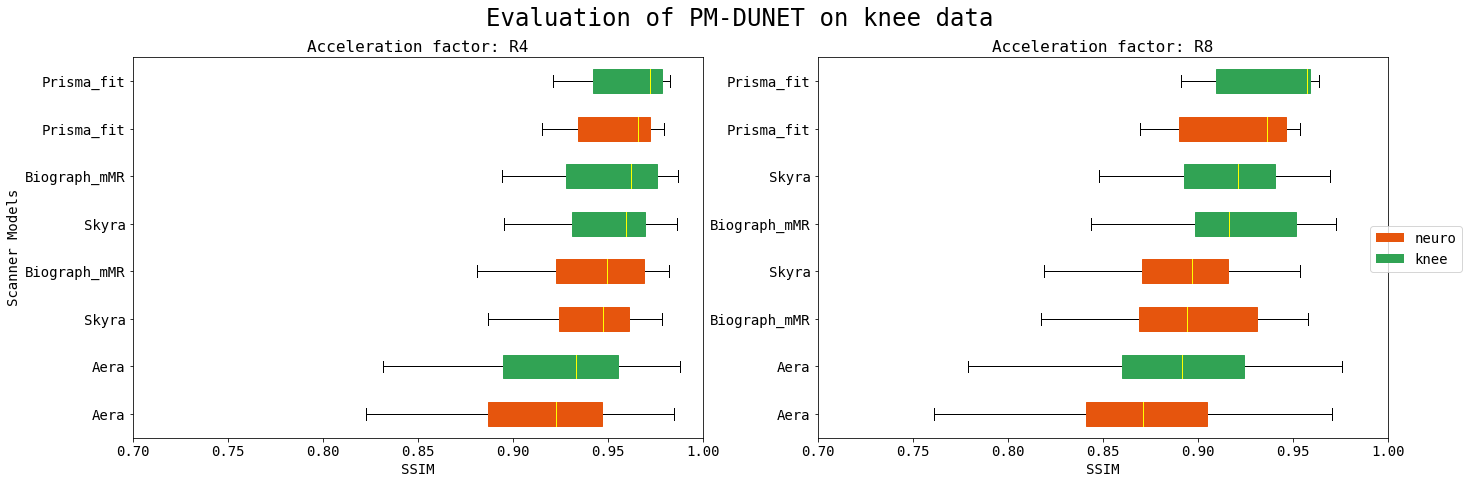

In [18]:
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.titlesize'] = 20

anatomy = 'knee'
Revals = [4, 8]

eval_metric = 'SSIM'
eval_dset = ['neuro','knee 100'] # name of dataset in csv
disp_dset = ['neuro','knee'] # display name of dataset

network_type = 'PM-DUNET'

fig, axis = plt.subplots(1, len(Revals), figsize=((len(Revals) + 0.25)*10, 7))

meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

legend = get_legend(eval_dset, disp_dset)
min_xlim = []

for i, Reval in enumerate(Revals):
    df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')
    df = df_raw
    df = df[df.network == network_type]

    anatomy_keys = df['anatomy'].unique()
    model_keys = df['systemModel'].unique()
    print(model_keys)
    # only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
    anatomy_keys = [key for key in anatomy_keys if key in eval_dset]

    data, labels, colors = get_plotting_data_boxplots(df, model_keys, anatomy_keys, eval_metric, network_column='systemModel')
    # Creating plot
    bp = axis[i].boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)
    #bp = ax.boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops, meanprops=meanlineprops, meanline=True, show_mean = True)

    axis[i].set_title(f'Acceleration factor: R{Reval}')
    axis[i].set_xlabel(eval_metric)
    axis[0].set_ylabel("Scanner Models")
    axis[i].set_aspect('auto', adjustable='box')
    # set colors
    cmap = plt.cm.tab20c
    for line, color in zip(bp['boxes'], colors):
        line.set_color(color[0])
    
    min_xlim.append(min([min(x) for x in data]))

# set common x-axis value for all subplot
xlim = (round(min(min_xlim)-0.01, 2), 1.0)
xlim = (0.7, 1.0)
for i, _ in enumerate(Revals):
    axis[i].set_xlim(xlim)

# show plot
fig.suptitle(f"Evaluation of PM-DUNET on knee data", fontsize=24)
fig.legend(handles=legend, loc='center right', bbox_to_anchor=(0.95,0.5), fontsize=14)
plt.show()

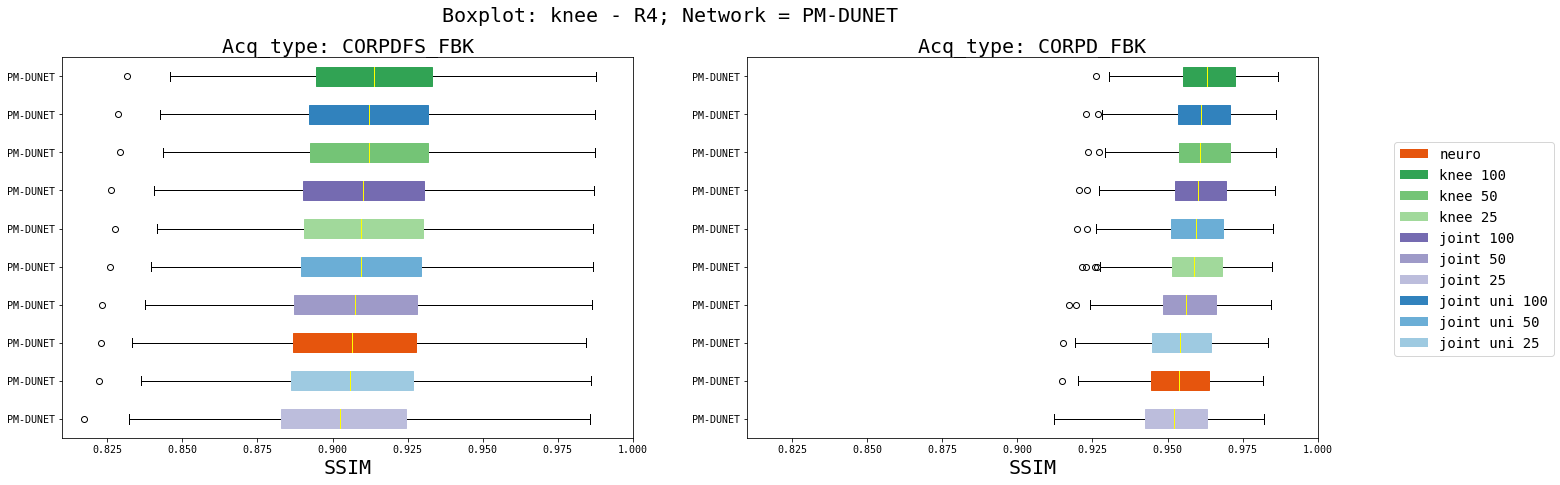

In [17]:
network = "PM-DUNET"

anatomy = 'knee'
Reval = 4

eval_metric = 'SSIM'
eval_dset = ['neuro', 'knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint 100 uni', 'joint 50 uni', 'joint 25 uni']  # name of dataset in csv
disp_dset = ['neuro', 'knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint uni 100', 'joint uni 50', 'joint uni 25'] # display name of dataset
meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')

# evaluate wrt. SSIM and drop other measures
drop_metric = [m for m in ['MSE', 'PSNR', 'NMSE', 'SSIM'] if m != eval_metric]
df_raw.drop(columns=drop_metric, inplace=True)

acq_types = df_raw['acquisition'].unique() # brain: ['AXFLAIR' 'AXT1POST' 'AXT1' 'AXT2']
anatomy_keys = df_raw['anatomy'].unique()

fig, axis = plt.subplots(1, len(acq_types), figsize=((len(acq_types) + 0.25)*10, 7))
legend = get_legend(eval_dset, disp_dset)

df_raw = df_raw[df_raw.network == network]

min_xlim = []

for i, acq_type in enumerate(acq_types):
    df = df_raw
    df = df[df.acquisition == acq_type]

    # only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
    anatomy_keys = [key for key in anatomy_keys if key in eval_dset]
    network_keys = df['network'].unique()

    data, labels, colors = get_plotting_data_boxplots(df, network_keys, anatomy_keys, eval_metric, network_column='network')

    # Creating plot in subplot
    bp = axis[i].boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)

    axis[i].set_title(f'Acq_type: {acq_type}', fontsize=20)
    axis[i].set_xlabel(eval_metric, fontsize=20)
    axis[i].set_aspect('auto', adjustable='box')
    # set colors
    for line, color in zip(bp['boxes'], colors):
        line.set_color(color[0])

    min_xlim.append(min([min(x) for x in data]))

# set common x-axis value for all subplot
xlim = (round(min(min_xlim)-0.01, 2), 1.0)
for i, _ in enumerate(acq_types):
    axis[i].set_xlim(xlim)

legend = get_legend(eval_dset, disp_dset)
# show plot
fig.suptitle(f"Boxplot: {anatomy} - R{Reval}; Network = {network}", fontsize=20)
fig.legend(handles=legend, loc='center right', bbox_to_anchor=(1.05,0.5), fontsize=14)
plt.show()

# Ranked List for further datasets - Boxplots

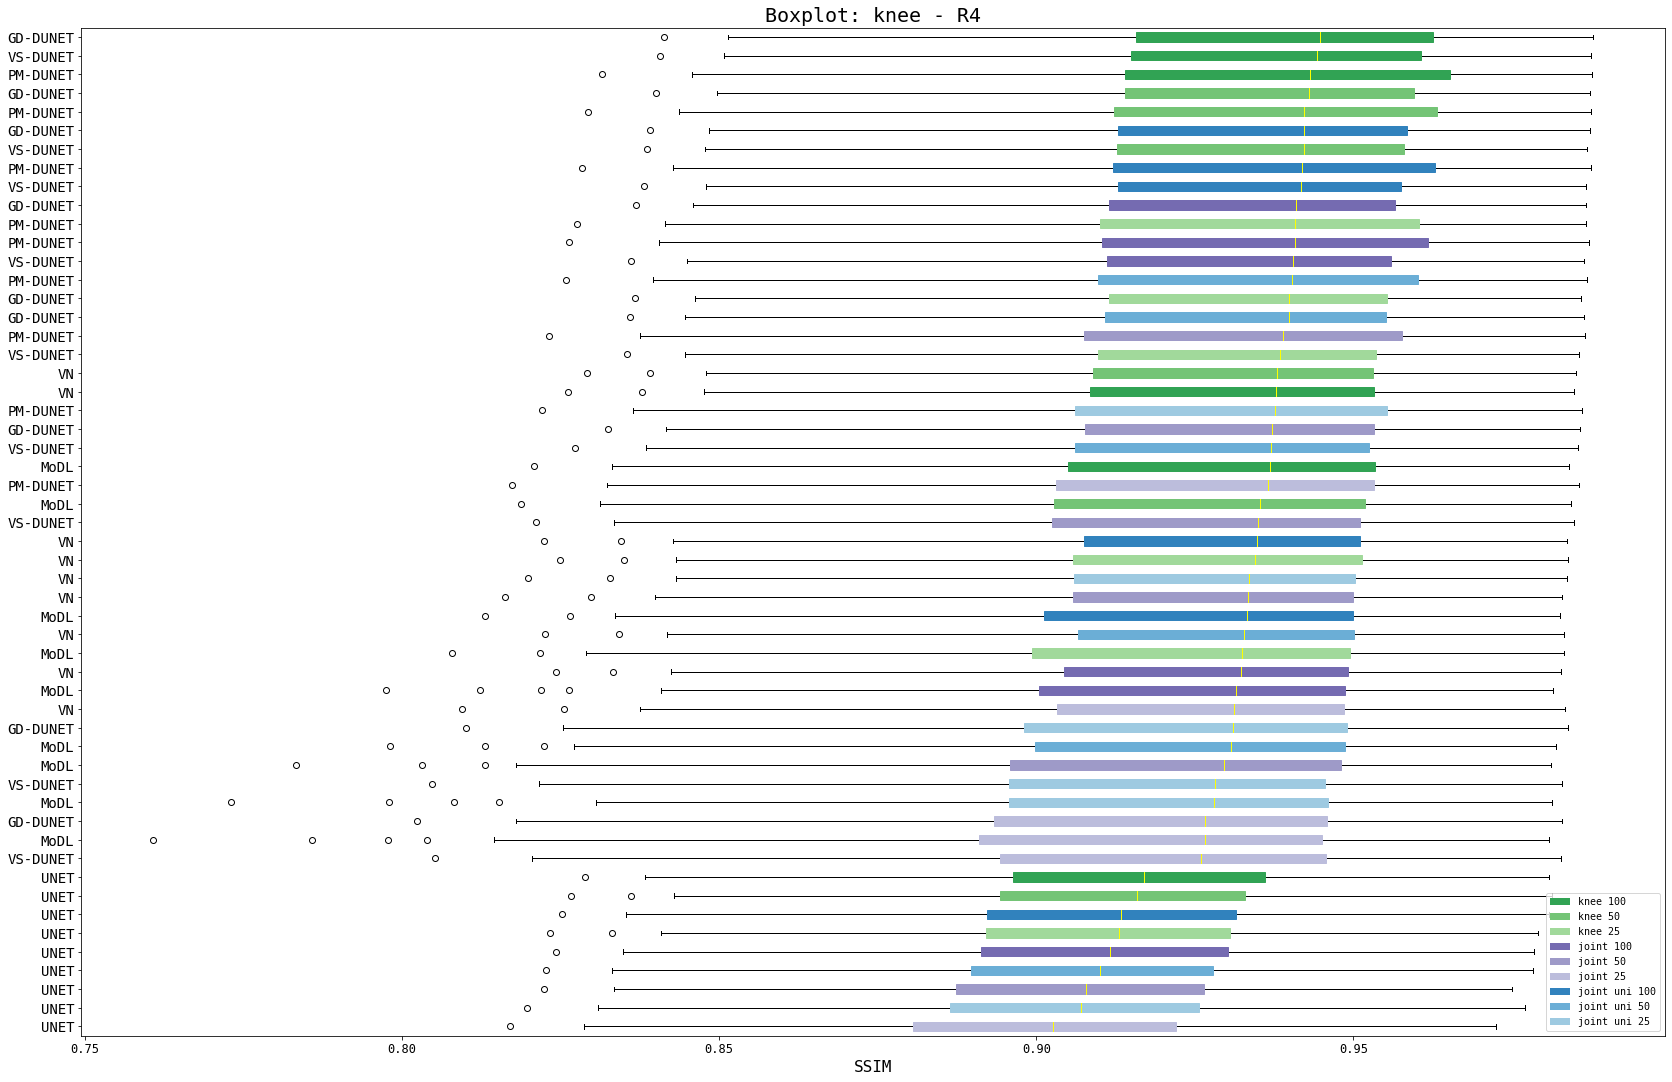

In [15]:
anatomy = 'knee'
Reval = 4

eval_metric = 'SSIM'
eval_dset = ['neuro','knee 100'] # name of dataset in csv
disp_dset = ['neuro','knee'] # display name of dataset
eval_dset = ['knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint 100 uni', 'joint 50 uni', 'joint 25 uni']  # name of dataset in csv
disp_dset = ['knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint uni 100', 'joint uni 50', 'joint uni 25'] # display name of dataset

df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')

df = df_raw
# evaluate wrt. SSIM and drop other measures
drop_metric = [m for m in ['MSE', 'PSNR', 'NMSE', 'SSIM'] if m != eval_metric]
df.drop(columns=drop_metric, inplace=True)

anatomy_keys = df['anatomy'].unique()
network_keys = df['network'].unique()

# only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
anatomy_keys = [key for key in anatomy_keys if key in eval_dset]

data, labels, colors = get_plotting_data_boxplots(df, network_keys, anatomy_keys, eval_metric, network_column='network')
legend = get_legend(eval_dset, disp_dset)

# plotting:
fig = plt.figure(figsize =(22, 14))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

# Creating plot
bp = ax.boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)
#bp = ax.boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops, meanprops=meanlineprops, meanline=True, show_mean = True)

# set colors
for line, color in zip(bp['boxes'], colors):
    line.set_color(color[0])

# show plot
plt.title(f"Boxplot: {anatomy} - R{Reval}", fontsize=20)
plt.legend(handles=legend, loc='lower right')
plt.xlabel(eval_metric, fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.show()

# Ranked List for further datasets - Boxplots - for one network

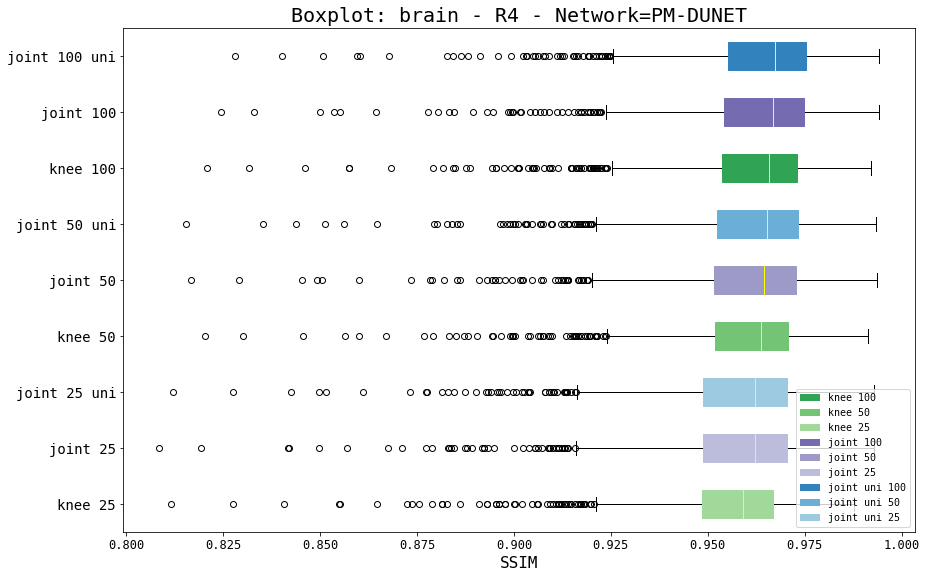

In [6]:
network = "PM-DUNET"

anatomy = 'brain'
Reval = 4

eval_metric = 'SSIM'
eval_dset = ['neuro','knee 100'] # name of dataset in csv
disp_dset = ['neuro','knee'] # display name of dataset
eval_dset = ['knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint 100 uni', 'joint 50 uni', 'joint 25 uni']  # name of dataset in csv
disp_dset = ['knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint uni 100', 'joint uni 50', 'joint uni 25'] # display name of dataset

df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')

df = df_raw
# evaluate wrt. SSIM and drop other measures
drop_metric = [m for m in ['MSE', 'PSNR', 'NMSE', 'SSIM'] if m != eval_metric]
df.drop(columns=drop_metric, inplace=True)

anatomy_keys = df['anatomy'].unique()
df = df[df.network == network]
network_keys = df['network'].unique()

# only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
anatomy_keys = [key for key in anatomy_keys if key in eval_dset]

data, labels, colors = get_plotting_data_boxplots(df, network_keys, anatomy_keys, eval_metric, network_column='network')
legend = get_legend(eval_dset, disp_dset)

# plotting:
fig = plt.figure(figsize =(11, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

# Creating plot
bp = ax.boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)
#bp = ax.boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops, meanprops=meanlineprops, meanline=True, show_mean = True)

# set colors
for line, color in zip(bp['boxes'], colors):
    line.set_color(color[0])

# show plot
plt.title(f"Boxplot: {anatomy} - R{Reval} - Network = {network}", fontsize=20)
plt.legend(handles=legend, loc='lower right')
plt.xlabel(eval_metric, fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.show()

# Ranked List for further datasets - Boxplots - for one network and acquistion type

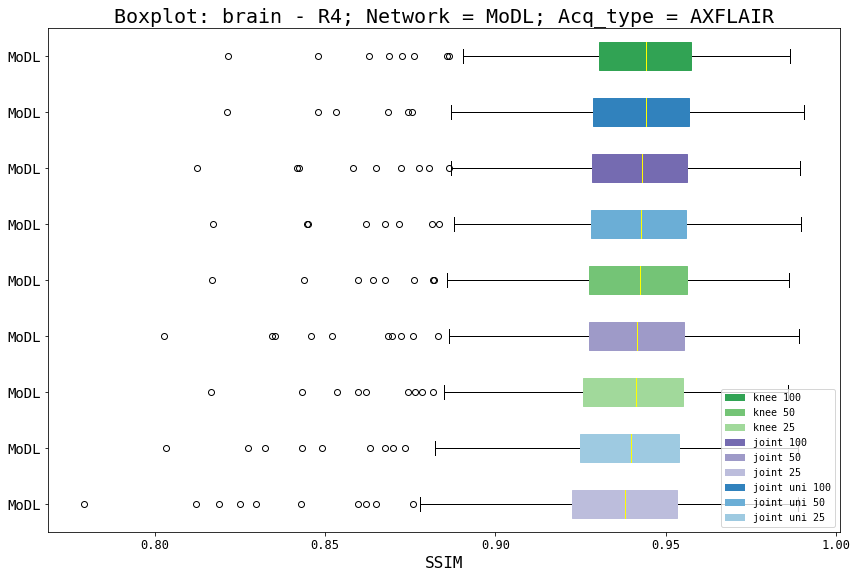

In [15]:
network = "MoDL"
acq_type = "AXFLAIR" # brain: ['AXFLAIR' 'AXT1POST' 'AXT1' 'AXT2']

anatomy = 'brain'
Reval = 4

eval_metric = 'SSIM'
eval_dset = ['neuro','knee 100'] # name of dataset in csv
disp_dset = ['neuro','knee'] # display name of dataset
eval_dset = ['knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint 100 uni', 'joint 50 uni', 'joint 25 uni']  # name of dataset in csv
disp_dset = ['knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint uni 100', 'joint uni 50', 'joint uni 25'] # display name of dataset

meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')

df = df_raw
# evaluate wrt. SSIM and drop other measures
drop_metric = [m for m in ['MSE', 'PSNR', 'NMSE', 'SSIM'] if m != eval_metric]
df.drop(columns=drop_metric, inplace=True)

df = df[df.network == network]

acq_types = df['acquisition'].unique()
anatomy_keys = df['anatomy'].unique()
network_keys = df['network'].unique()


# only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
anatomy_keys = [key for key in anatomy_keys if key in eval_dset]

legend = get_legend(eval_dset, disp_dset)

df = df[df.acquisition == acq_type]

data, labels, colors = get_plotting_data_boxplots(df, network_keys, anatomy_keys, eval_metric, network_column='network')

# plotting:
fig = plt.figure(figsize =(11, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)
#bp = ax.boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops, meanprops=meanlineprops, meanline=True, show_mean = True)

# set colors
for line, color in zip(bp['boxes'], colors):
    line.set_color(color[0])

# show plot
plt.title(f"Boxplot: {anatomy} - R{Reval}; Network = {network}; Acq_type = {acq_type}", fontsize=20)
plt.legend(handles=legend, loc='lower right')
plt.xlabel(eval_metric, fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.show()

# Ranked List for further datasets - Boxplots - for one network and several acquistion types

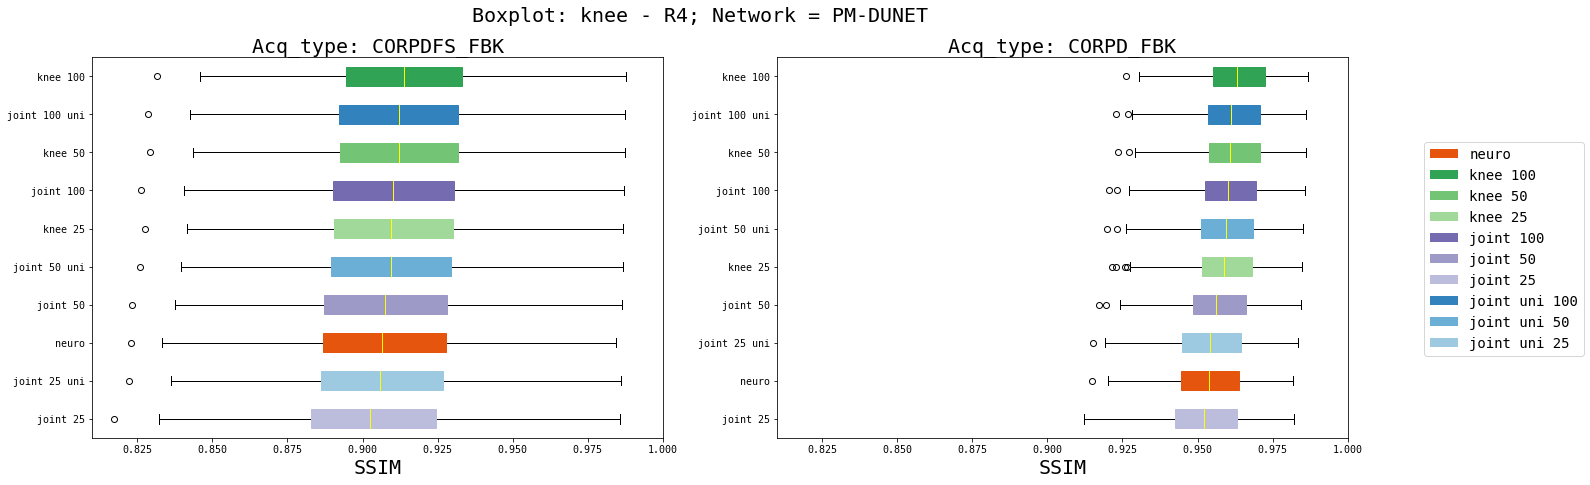

In [8]:
network = "PM-DUNET"

anatomy = 'knee'
Reval = 4

eval_metric = 'SSIM'
eval_dset = ['neuro', 'knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint 100 uni', 'joint 50 uni', 'joint 25 uni']  # name of dataset in csv
disp_dset = ['neuro', 'knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint uni 100', 'joint uni 50', 'joint uni 25'] # display name of dataset
meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')

# evaluate wrt. SSIM and drop other measures
drop_metric = [m for m in ['MSE', 'PSNR', 'NMSE', 'SSIM'] if m != eval_metric]
df_raw.drop(columns=drop_metric, inplace=True)

acq_types = df_raw['acquisition'].unique() # brain: ['AXFLAIR' 'AXT1POST' 'AXT1' 'AXT2']
anatomy_keys = df_raw['anatomy'].unique()

fig, axis = plt.subplots(1, len(acq_types), figsize=((len(acq_types) + 0.25)*10, 7))
legend = get_legend(eval_dset, disp_dset)

df_raw = df_raw[df_raw.network == network]

min_xlim = []

for i, acq_type in enumerate(acq_types):
    df = df_raw
    df = df[df.acquisition == acq_type]

    # only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
    anatomy_keys = [key for key in anatomy_keys if key in eval_dset]
    network_keys = df['network'].unique()

    data, labels, colors = get_plotting_data_boxplots(df, network_keys, anatomy_keys, eval_metric, network_column='network')

    # Creating plot in subplot
    bp = axis[i].boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)

    axis[i].set_title(f'Acq_type: {acq_type}', fontsize=20)
    axis[i].set_xlabel(eval_metric, fontsize=20)
    axis[i].set_aspect('auto', adjustable='box')
    # set colors
    for line, color in zip(bp['boxes'], colors):
        line.set_color(color[0])

    min_xlim.append(min([min(x) for x in data]))

# set common x-axis value for all subplot
xlim = (round(min(min_xlim)-0.01, 2), 1.0)
for i, _ in enumerate(acq_types):
    axis[i].set_xlim(xlim)

legend = get_legend(eval_dset, disp_dset)
# show plot
fig.suptitle(f"Boxplot: {anatomy} - R{Reval}; Network = {network}", fontsize=20)
fig.legend(handles=legend, loc='center right', bbox_to_anchor=(1.05,0.5), fontsize=14)
plt.show()

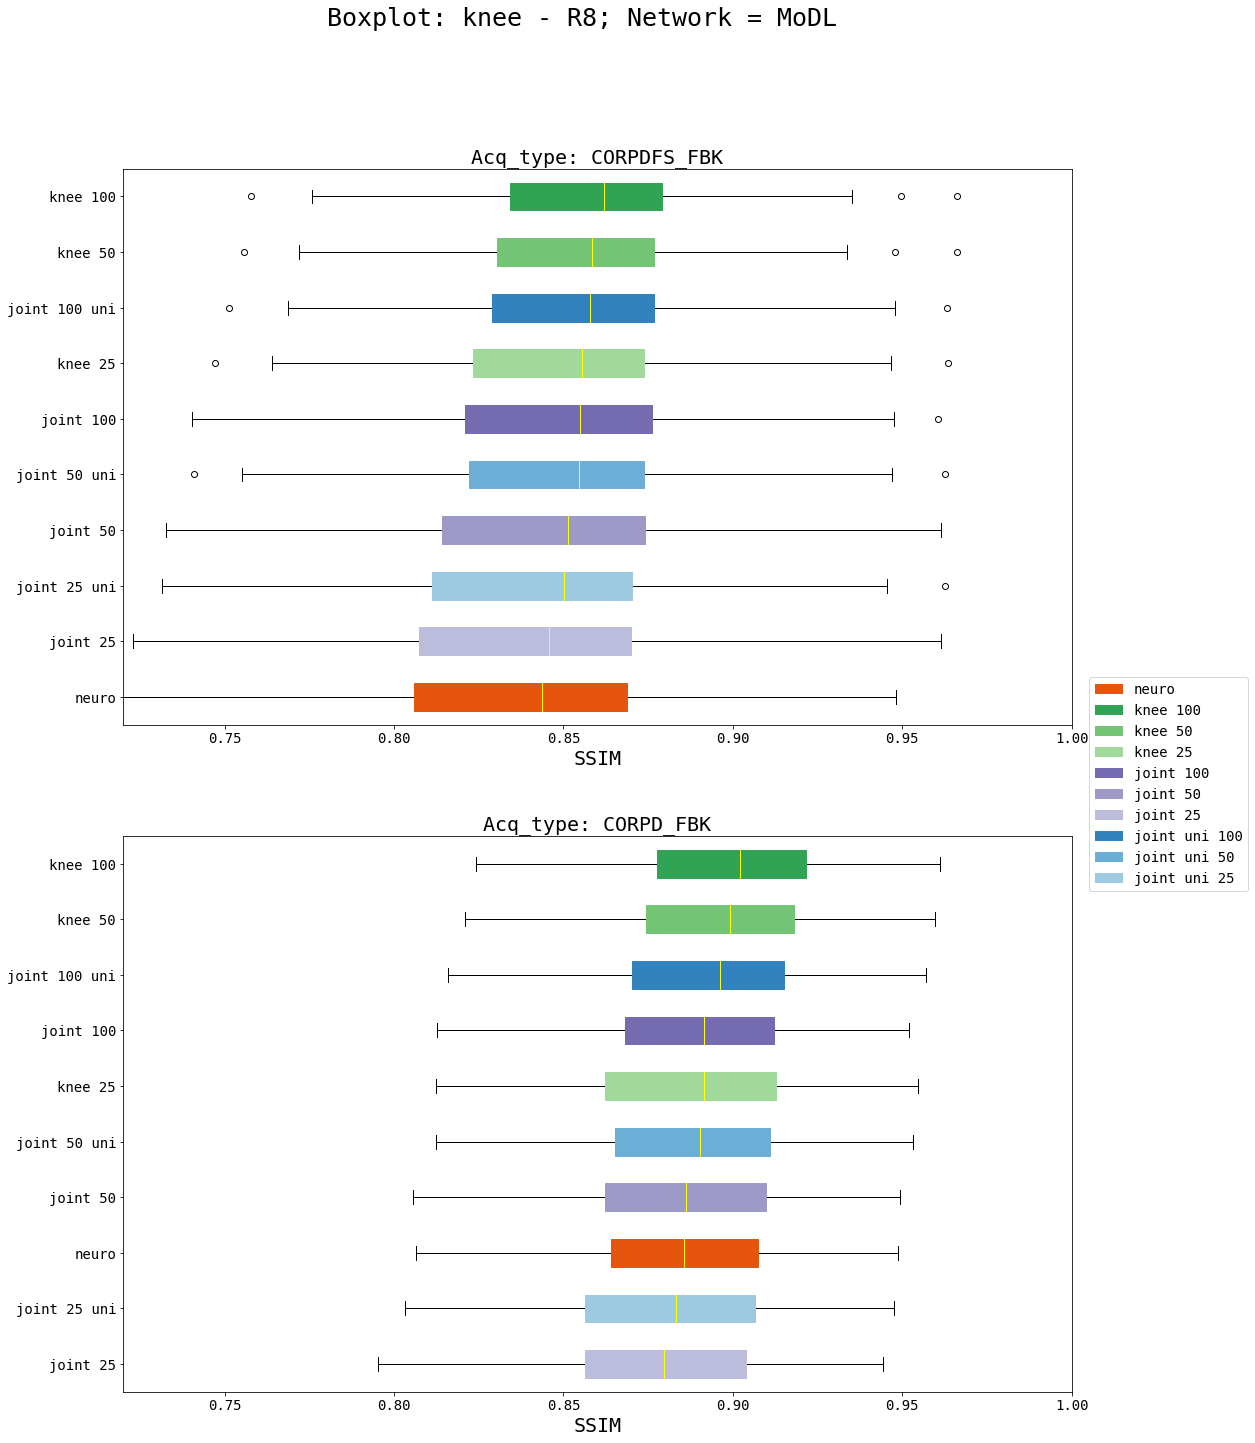

In [11]:
network = "MoDL"

anatomy = 'knee'
Reval = 8

eval_metric = 'SSIM'
eval_dset = ['neuro', 'knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint 100 uni', 'joint 50 uni', 'joint 25 uni']  # name of dataset in csv
disp_dset = ['neuro', 'knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint uni 100', 'joint uni 50', 'joint uni 25'] # display name of dataset
meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')

# evaluate wrt. SSIM and drop other measures
drop_metric = [m for m in ['MSE', 'PSNR', 'NMSE', 'SSIM'] if m != eval_metric]
df_raw.drop(columns=drop_metric, inplace=True)

acq_types = df_raw['acquisition'].unique() # brain: ['AXFLAIR' 'AXT1POST' 'AXT1' 'AXT2']
anatomy_keys = df_raw['anatomy'].unique()

fig, axis = plt.subplots(len(acq_types), 1, figsize=(17, (len(acq_types) + 0.25)*10))
legend = get_legend(eval_dset, disp_dset)

df_raw = df_raw[df_raw.network == network]

min_xlim = []

for i, acq_type in enumerate(acq_types):
    df = df_raw
    df = df[df.acquisition == acq_type]

    # only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
    anatomy_keys = [key for key in anatomy_keys if key in eval_dset]
    network_keys = df['network'].unique()

    data, labels, colors = get_plotting_data_boxplots(df, network_keys, anatomy_keys, eval_metric, network_column='network')

    # Creating plot in subplot
    bp = axis[i].boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)

    axis[i].set_title(f'Acq_type: {acq_type}', fontsize=20)
    axis[i].set_xlabel(eval_metric, fontsize=20)
    axis[i].set_aspect('auto', adjustable='box')
    # set colors
    for line, color in zip(bp['boxes'], colors):
        line.set_color(color[0])

    min_xlim.append(min([min(x) for x in data]))

# set common x-axis value for all subplot
xlim = (round(min(min_xlim)-0.01, 2), 1.0)
xlim = (0.72, 1.0)
for i, _ in enumerate(acq_types):
    axis[i].set_xlim(xlim)
    axis[i].tick_params(axis='y', labelsize=14)
    axis[i].tick_params(axis='x', labelsize=14)

legend = get_legend(eval_dset, disp_dset)
# show plot
fig.suptitle(f"Boxplot: {anatomy} - R{Reval}; Network = {network}", fontsize=25)
fig.legend(handles=legend, loc='center right', bbox_to_anchor=(1.05,0.5), fontsize=14)
plt.show()

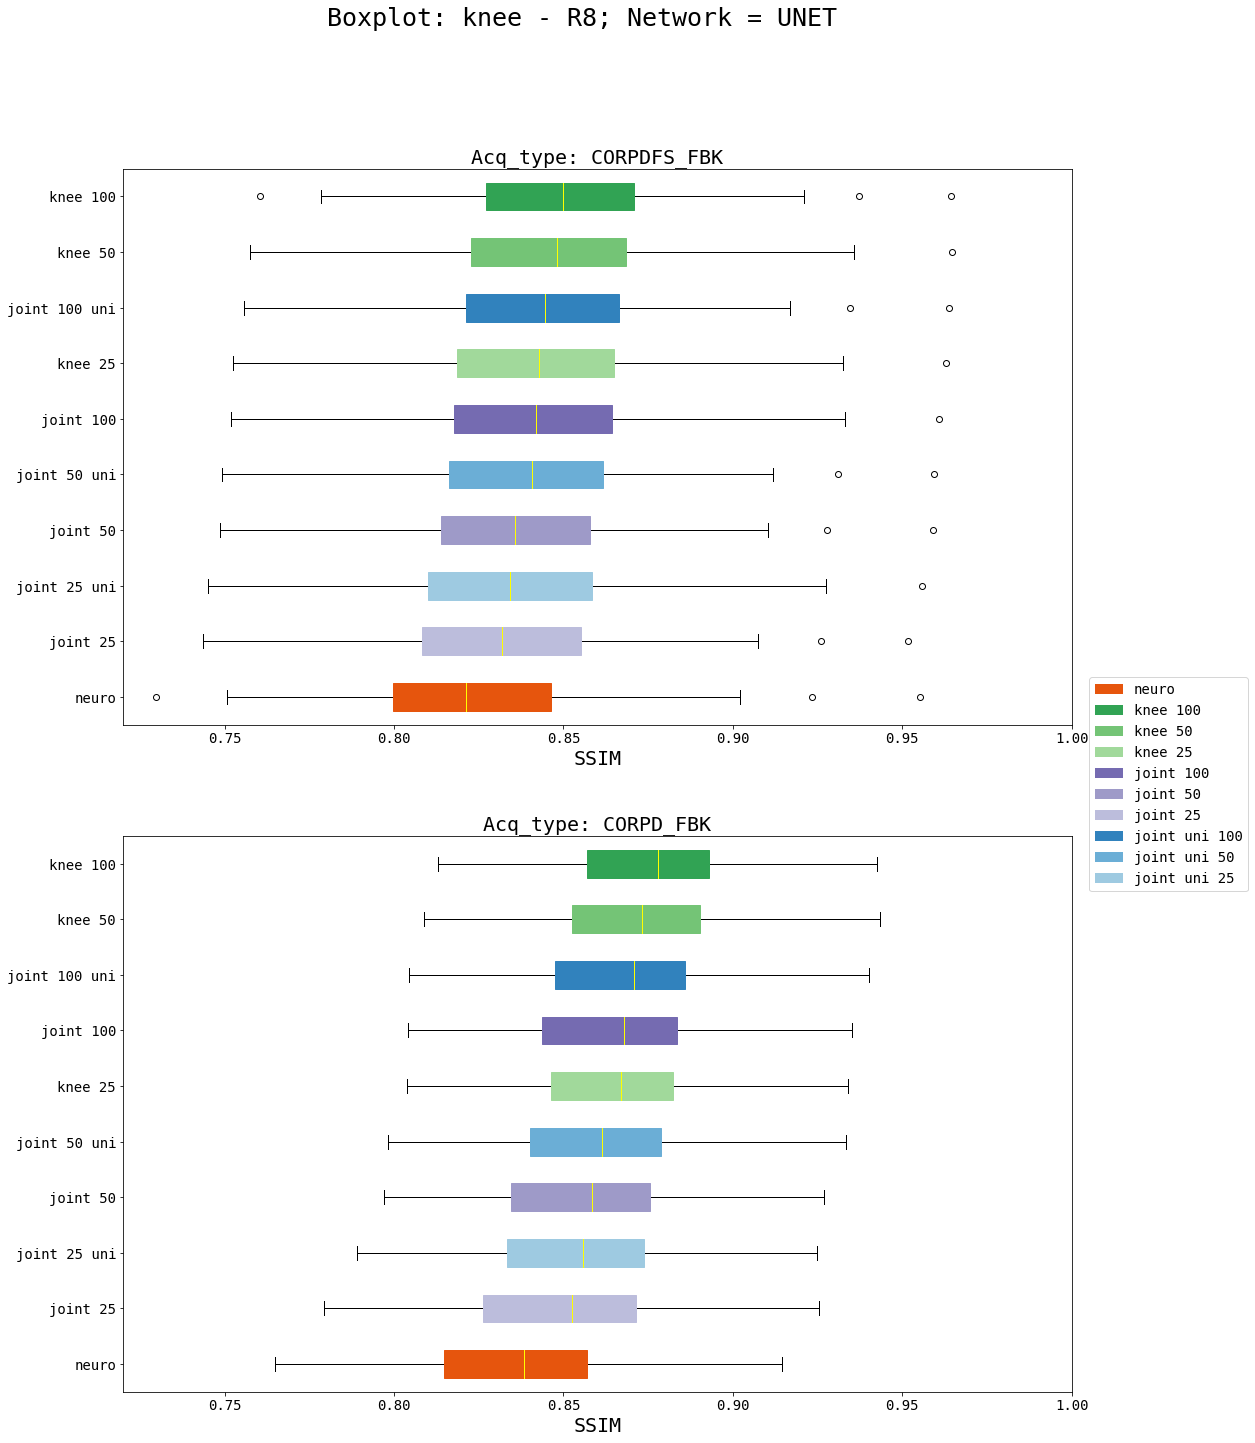

In [12]:
network = "UNET"

anatomy = 'knee'
Reval = 8

eval_metric = 'SSIM'
eval_dset = ['neuro', 'knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint 100 uni', 'joint 50 uni', 'joint 25 uni']  # name of dataset in csv
disp_dset = ['neuro', 'knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint uni 100', 'joint uni 50', 'joint uni 25'] # display name of dataset
meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')

# evaluate wrt. SSIM and drop other measures
drop_metric = [m for m in ['MSE', 'PSNR', 'NMSE', 'SSIM'] if m != eval_metric]
df_raw.drop(columns=drop_metric, inplace=True)

acq_types = df_raw['acquisition'].unique() # brain: ['AXFLAIR' 'AXT1POST' 'AXT1' 'AXT2']
anatomy_keys = df_raw['anatomy'].unique()

fig, axis = plt.subplots(len(acq_types), 1, figsize=(17, (len(acq_types) + 0.25)*10))
legend = get_legend(eval_dset, disp_dset)

df_raw = df_raw[df_raw.network == network]

min_xlim = []

for i, acq_type in enumerate(acq_types):
    df = df_raw
    df = df[df.acquisition == acq_type]

    # only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
    anatomy_keys = [key for key in anatomy_keys if key in eval_dset]
    network_keys = df['network'].unique()

    data, labels, colors = get_plotting_data_boxplots(df, network_keys, anatomy_keys, eval_metric, network_column='network')

    # Creating plot in subplot
    bp = axis[i].boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)

    axis[i].set_title(f'Acq_type: {acq_type}', fontsize=20)
    axis[i].set_xlabel(eval_metric, fontsize=20)
    axis[i].set_aspect('auto', adjustable='box')
    # set colors
    for line, color in zip(bp['boxes'], colors):
        line.set_color(color[0])

    min_xlim.append(min([min(x) for x in data]))

# set common x-axis value for all subplot
xlim = (round(min(min_xlim)-0.01, 2), 1.0)
xlim = (0.72, 1.0)
for i, _ in enumerate(acq_types):
    axis[i].set_xlim(xlim)
    axis[i].tick_params(axis='y', labelsize=14)
    axis[i].tick_params(axis='x', labelsize=14)

legend = get_legend(eval_dset, disp_dset)
# show plot
fig.suptitle(f"Boxplot: {anatomy} - R{Reval}; Network = {network}", fontsize=25)
fig.legend(handles=legend, loc='center right', bbox_to_anchor=(1.05,0.5), fontsize=14)
plt.show()

CORPDFS_FBK
CORPD_FBK


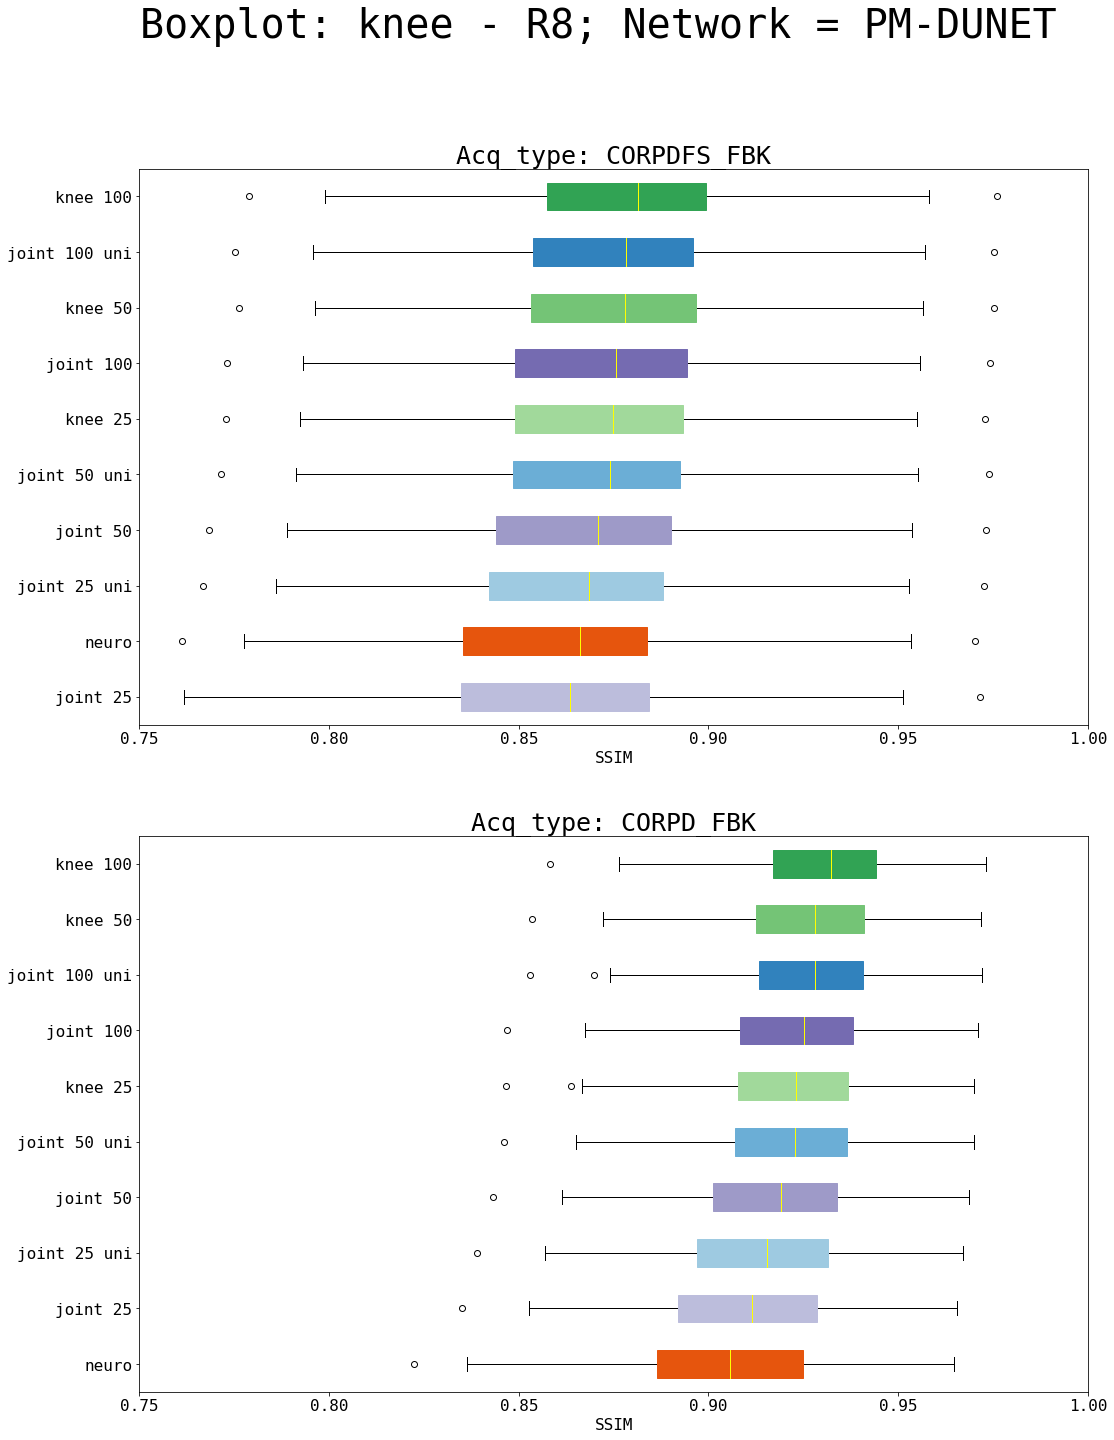

In [8]:
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['figure.titlesize'] = 40

network = "PM-DUNET"

anatomy = 'knee'
Reval = 8

eval_metric = 'SSIM'
eval_dset = ['neuro', 'knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint 100 uni', 'joint 50 uni', 'joint 25 uni']  # name of dataset in csv
disp_dset = ['neuro', 'knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint uni 100', 'joint uni 50', 'joint uni 25'] # display name of dataset
meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')

# evaluate wrt. SSIM and drop other measures
drop_metric = [m for m in ['MSE', 'PSNR', 'NMSE', 'SSIM'] if m != eval_metric]
df_raw.drop(columns=drop_metric, inplace=True)

acq_types = df_raw['acquisition'].unique() # brain: ['AXFLAIR' 'AXT1POST' 'AXT1' 'AXT2']
anatomy_keys = df_raw['anatomy'].unique()

fig, axis = plt.subplots(len(acq_types), 1, figsize=(17, (len(acq_types) + 0.25)*10))
legend = get_legend(eval_dset, disp_dset)

df_raw = df_raw[df_raw.network == network]

min_xlim = []

for i, acq_type in enumerate(acq_types):
    df = df_raw
    df = df[df.acquisition == acq_type]

    # only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
    anatomy_keys = [key for key in anatomy_keys if key in eval_dset]
    network_keys = df['network'].unique()

    data, labels, colors = get_plotting_data_boxplots(df, network_keys, anatomy_keys, eval_metric, network_column='network')

    # Creating plot in subplot
    bp = axis[i].boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)
    print(acq_type)
    axis[i].set_title(f'Acq_type: {acq_type}')
    axis[i].set_xlabel(eval_metric)
    axis[i].set_aspect('auto', adjustable='box')
    # set colors
    for line, color in zip(bp['boxes'], colors):
        line.set_color(color[0])

    min_xlim.append(min([min(x) for x in data]))

# set common x-axis value for all subplot
xlim = (round(min(min_xlim)-0.01, 2), 1.0)
xlim = (0.75, 1.0)
for i, _ in enumerate(acq_types):
    axis[i].set_xlim(xlim)
    axis[i].tick_params(axis='y')
    axis[i].tick_params(axis='x')

legend = get_legend(eval_dset, disp_dset)
# show plot
fig.suptitle(f"Boxplot: {anatomy} - R{Reval}; Network = {network}")
#fig.legend(handles=legend, loc='center right', bbox_to_anchor=(1.05,0.5), fontsize=14)
plt.show()

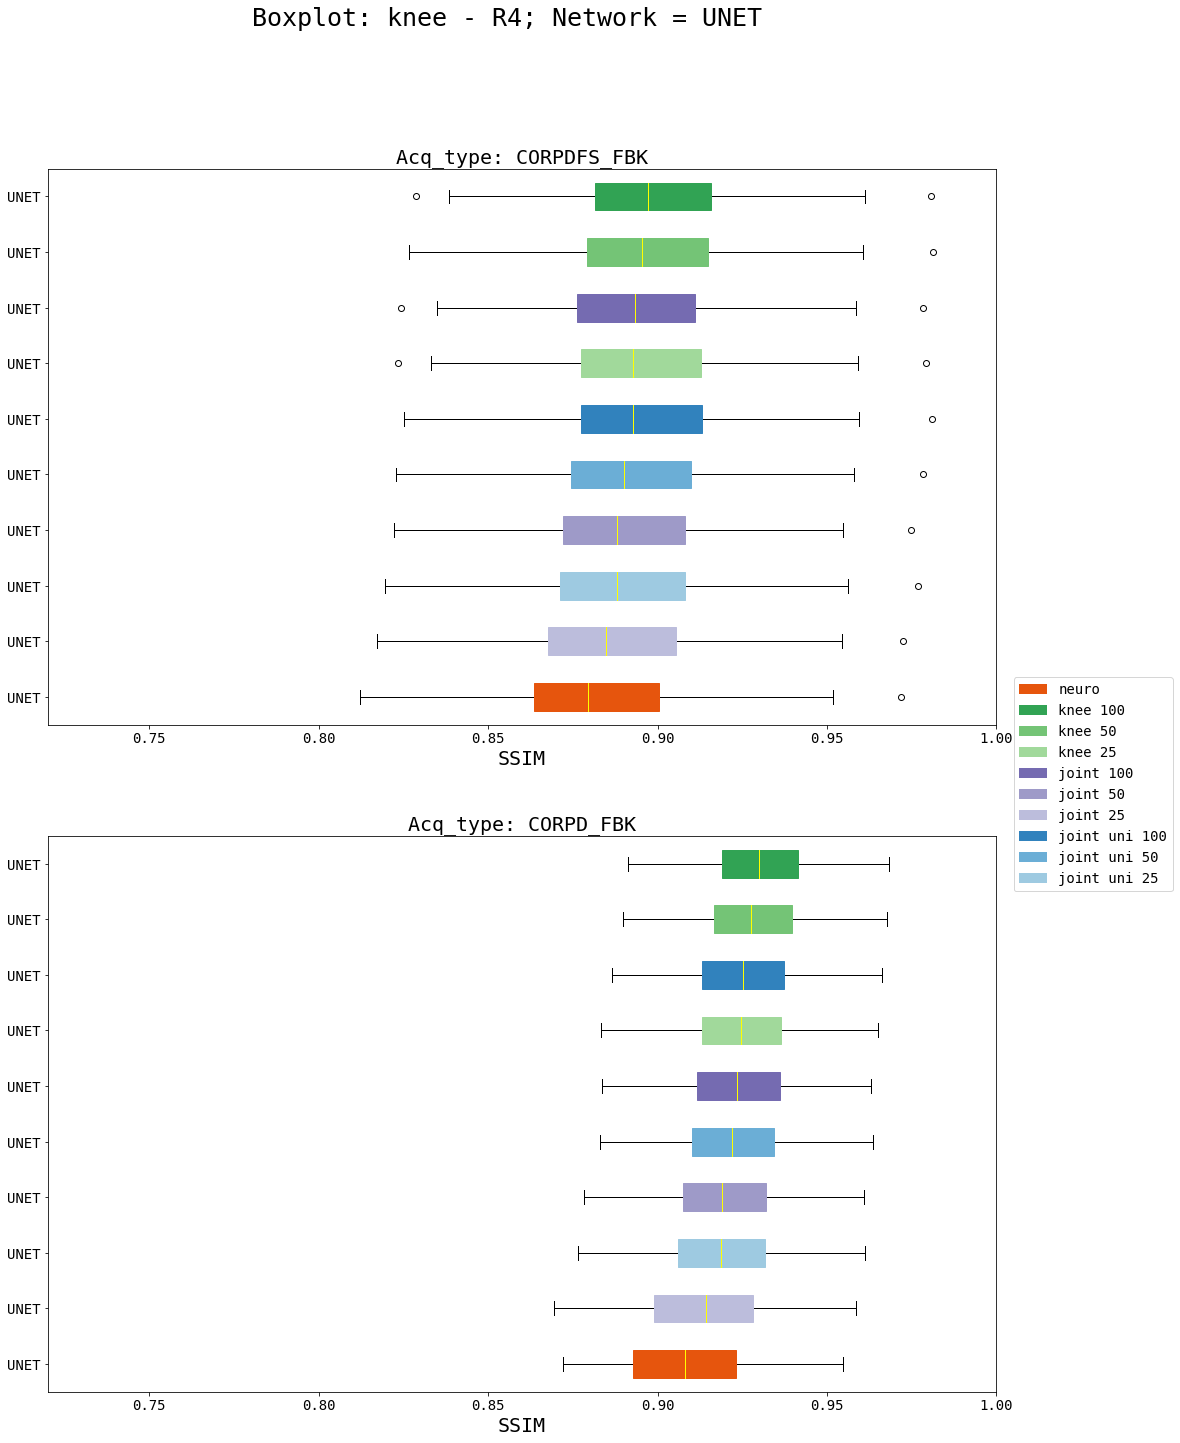

In [22]:
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["axes.titlesize"] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['figure.titlesize'] = 25


network = "UNET"

anatomy = 'knee'
Reval = 4

eval_metric = 'SSIM'
eval_dset = ['neuro', 'knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint 100 uni', 'joint 50 uni', 'joint 25 uni']  # name of dataset in csv
disp_dset = ['neuro', 'knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint uni 100', 'joint uni 50', 'joint uni 25'] # display name of dataset
meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')

# evaluate wrt. SSIM and drop other measures
drop_metric = [m for m in ['MSE', 'PSNR', 'NMSE', 'SSIM'] if m != eval_metric]
df_raw.drop(columns=drop_metric, inplace=True)

acq_types = df_raw['acquisition'].unique() # brain: ['AXFLAIR' 'AXT1POST' 'AXT1' 'AXT2']
anatomy_keys = df_raw['anatomy'].unique()

fig, axis = plt.subplots(len(acq_types), 1, figsize=(17, (len(acq_types) + 0.25)*10))
legend = get_legend(eval_dset, disp_dset)

df_raw = df_raw[df_raw.network == network]

min_xlim = []

for i, acq_type in enumerate(acq_types):
    df = df_raw
    df = df[df.acquisition == acq_type]

    # only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
    anatomy_keys = [key for key in anatomy_keys if key in eval_dset]
    network_keys = df['network'].unique()

    data, labels, colors = get_plotting_data_boxplots(df, network_keys, anatomy_keys, eval_metric, network_column='network')

    # Creating plot in subplot
    bp = axis[i].boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)

    axis[i].set_title(f'Acq_type: {acq_type}', fontsize=20)
    axis[i].set_xlabel(eval_metric, fontsize=20)
    axis[i].set_aspect('auto', adjustable='box')
    # set colors
    for line, color in zip(bp['boxes'], colors):
        line.set_color(color[0])

    min_xlim.append(min([min(x) for x in data]))

# set common x-axis value for all subplot
xlim = (round(min(min_xlim)-0.01, 2), 1.0)
xlim = (0.72, 1.0)
for i, _ in enumerate(acq_types):
    axis[i].set_xlim(xlim)
    axis[i].tick_params(axis='y', labelsize=14)
    axis[i].tick_params(axis='x', labelsize=14)

legend = get_legend(eval_dset, disp_dset)
# show plot
fig.suptitle(f"Boxplot: {anatomy} - R{Reval}; Network = {network}", fontsize=25)
fig.legend(handles=legend, loc='center right', bbox_to_anchor=(1.05,0.5), fontsize=14)
plt.show()

# Ranked List for further datasets - Boxplots - for one network and several scanner models

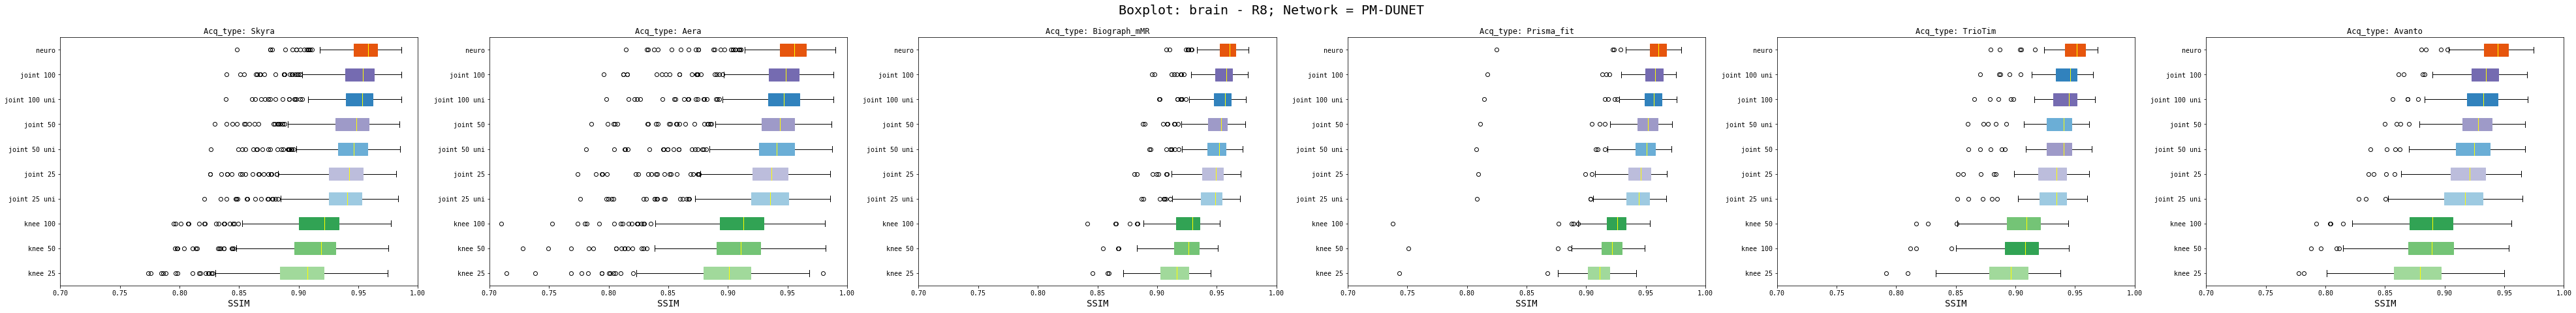

In [7]:
network = "PM-DUNET"

anatomy = 'brain'
Reval = 8

eval_metric = 'SSIM'
eval_dset = ['neuro','knee 100'] # name of dataset in csv
disp_dset = ['neuro','knee'] # display name of dataset
eval_dset = ['neuro', 'knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint 100 uni', 'joint 50 uni', 'joint 25 uni']  # name of dataset in csv
disp_dset = ['neuro', 'knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint uni 100', 'joint uni 50', 'joint uni 25'] # display name of dataset
meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')

# evaluate wrt. SSIM and drop other measures
drop_metric = [m for m in ['MSE', 'PSNR', 'NMSE', 'SSIM'] if m != eval_metric]
df_raw.drop(columns=drop_metric, inplace=True)

scanner_models = df_raw['systemModel'].unique() # brain: ['AXFLAIR' 'AXT1POST' 'AXT1' 'AXT2']
anatomy_keys = df_raw['anatomy'].unique()

fig, axis = plt.subplots(1, len(scanner_models), figsize=((len(scanner_models) + 0.25)*11, 7))
legend = get_legend(eval_dset, disp_dset)

df_raw = df_raw[df_raw.network == network]

min_xlim = []

for i, scanner_model in enumerate(scanner_models):
    df = df_raw
    df = df[df.systemModel == scanner_model]

    # only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
    anatomy_keys = [key for key in anatomy_keys if key in eval_dset]
    network_keys = df['network'].unique()

    data, labels, colors = get_plotting_data_boxplots(df, network_keys, anatomy_keys, eval_metric, network_column='network')

    # Creating plot in subplot
    bp = axis[i].boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)

    axis[i].set_title(f'Acq_type: {scanner_model}')
    axis[i].set_xlabel(eval_metric, fontsize=14)
    axis[i].set_aspect('auto', adjustable='box')
    # set colors
    for line, color in zip(bp['boxes'], colors):
        line.set_color(color[0])

    min_xlim.append(min([min(x) for x in data]))

# set common x-axis value for all subplot
xlim = (round(min(min_xlim)-0.01, 2), 1.0)
for i, _ in enumerate(scanner_models):
    axis[i].set_xlim(xlim)

# show plot
fig.suptitle(f"Boxplot: {anatomy} - R{Reval}; Network = {network}", fontsize=20)
#fig.legend(handles=legend, loc='center right')
plt.show()

# Ranked list: PM-DUNET vs GD-DUNET

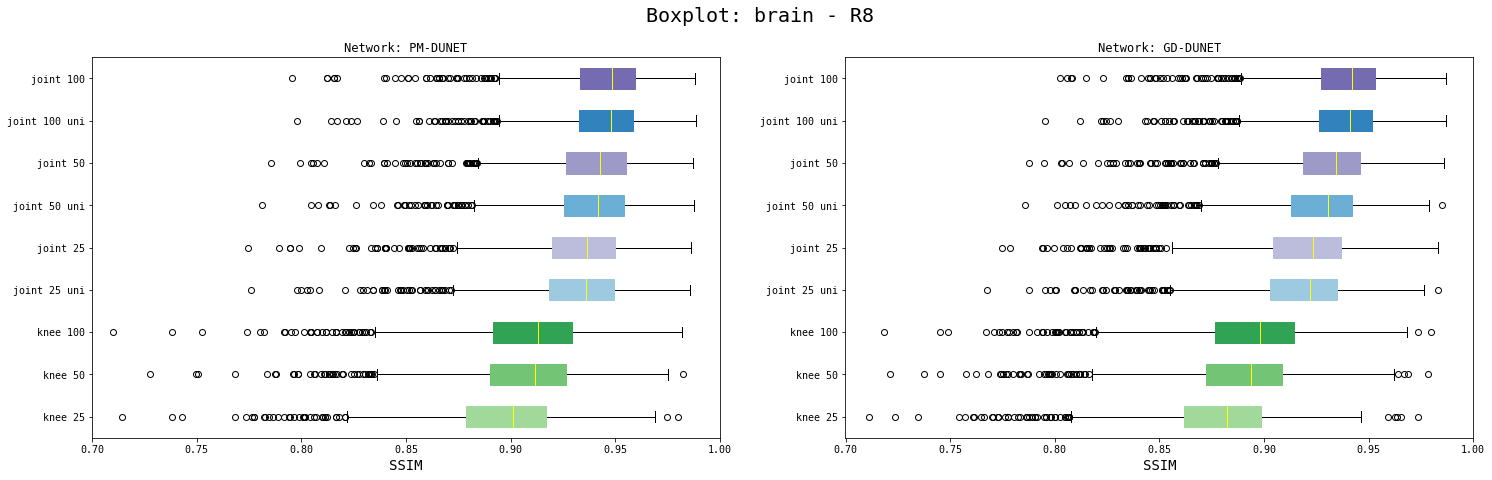

In [16]:
networks = ["PM-DUNET", "GD-DUNET"]

anatomy = 'brain'
Reval = 8

eval_metric = 'SSIM'
eval_dset = ['knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint 100 uni', 'joint 50 uni', 'joint 25 uni']  # name of dataset in csv
disp_dset = ['knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint uni 100', 'joint uni 50', 'joint uni 25'] # display name of dataset
meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')

# evaluate wrt. SSIM and drop other measures
drop_metric = [m for m in ['MSE', 'PSNR', 'NMSE', 'SSIM'] if m != eval_metric]
df_raw.drop(columns=drop_metric, inplace=True)

anatomy_keys = df_raw['anatomy'].unique()

fig, axis = plt.subplots(1, len(networks), figsize=((len(networks) + 0.25)*11, 7))
legend = get_legend(eval_dset, disp_dset)

min_xlim = []

for i, network in enumerate(networks):
    df = df_raw
    df = df[df.network == network]

    # only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
    anatomy_keys = [key for key in anatomy_keys if key in eval_dset]
    network_keys = df['network'].unique()

    data, labels, colors = get_plotting_data_boxplots(df, network_keys, anatomy_keys, eval_metric, network_column='network')

    # Creating plot in subplot
    bp = axis[i].boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)

    axis[i].set_title(f'Network: {network}')
    axis[i].set_xlabel(eval_metric, fontsize=14)
    axis[i].set_aspect('auto', adjustable='box')
    # set colors
    for line, color in zip(bp['boxes'], colors):
        line.set_color(color[0])

    min_xlim.append(min([min(x) for x in data]))

# set common x-axis value for all subplot
xlim = (round(min(min_xlim)-0.01, 2), 1.0)
for i, _ in enumerate(networks):
    axis[i].set_xlim(xlim)

# show plot
fig.suptitle(f"Boxplot: {anatomy} - R{Reval}", fontsize=20)
#fig.legend(handles=legend, loc='center right')
plt.show()

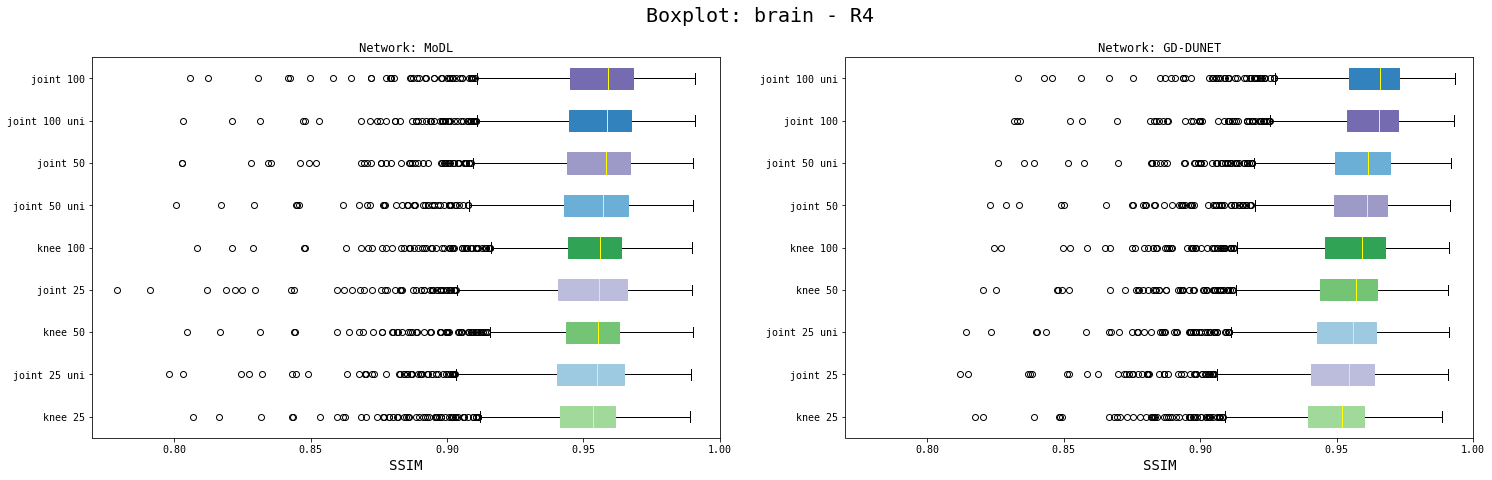

In [14]:
networks = ["MoDL", "GD-DUNET"]

anatomy = 'brain'
Reval = 4

eval_metric = 'SSIM'
eval_dset = ['knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint 100 uni', 'joint 50 uni', 'joint 25 uni']  # name of dataset in csv
disp_dset = ['knee 100', 'knee 50', 'knee 25', 'joint 100', 'joint 50', 'joint 25', 'joint uni 100', 'joint uni 50', 'joint uni 25'] # display name of dataset
meanlineprops = dict(linestyle='solid', linewidth=2.5, color='purple')
meadlineprops = dict(linestyle='-', color='yellow')

df_raw = pd.read_csv(f'./resources/{anatomy}/eval_{anatomy}_R{Reval}.csv')

# evaluate wrt. SSIM and drop other measures
drop_metric = [m for m in ['MSE', 'PSNR', 'NMSE', 'SSIM'] if m != eval_metric]
df_raw.drop(columns=drop_metric, inplace=True)

anatomy_keys = df_raw['anatomy'].unique()

fig, axis = plt.subplots(1, len(networks), figsize=((len(networks) + 0.25)*11, 7))
legend = get_legend(eval_dset, disp_dset)

min_xlim = []

for i, network in enumerate(networks):
    df = df_raw
    df = df[df.network == network]

    # only evaluate for knee 100 (full fastMRI knee dataset) and neuro data (full fastMRI neuro dataset)
    anatomy_keys = [key for key in anatomy_keys if key in eval_dset]
    network_keys = df['network'].unique()

    data, labels, colors = get_plotting_data_boxplots(df, network_keys, anatomy_keys, eval_metric, network_column='network')

    # Creating plot in subplot
    bp = axis[i].boxplot(data, labels=labels, patch_artist=True, vert=False, medianprops=meadlineprops)

    axis[i].set_title(f'Network: {network}')
    axis[i].set_xlabel(eval_metric, fontsize=14)
    axis[i].set_aspect('auto', adjustable='box')
    # set colors
    for line, color in zip(bp['boxes'], colors):
        line.set_color(color[0])

    min_xlim.append(min([min(x) for x in data]))

# set common x-axis value for all subplot
xlim = (round(min(min_xlim)-0.01, 2), 1.0)
for i, _ in enumerate(networks):
    axis[i].set_xlim(xlim)

# show plot
fig.suptitle(f"Boxplot: {anatomy} - R{Reval}", fontsize=20)
#fig.legend(handles=legend, loc='center right')
plt.show()